# Part 1 - Compute the optimal racing line

In [9]:
TRACK_NAME = 'Aragon'
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
action_space = pd.DataFrame(columns = ['id', 'speed', 'steering'])
action_sequence = []
optimal_racing_line = pd.DataFrame(columns = ['x', 'y', 'speed', 'distance_from_last_point'])

### Load the appropriate Track

In [11]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

In [12]:
# Load the waypoints
waypoints = np.load("../tracks/" + TRACK_NAME + ".npy")

# Build the geometrical objects
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]
l_center_line = LineString(center_line)
l_inner_border = LineString(inner_border)
l_outer_border = LineString(outer_border)
road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))

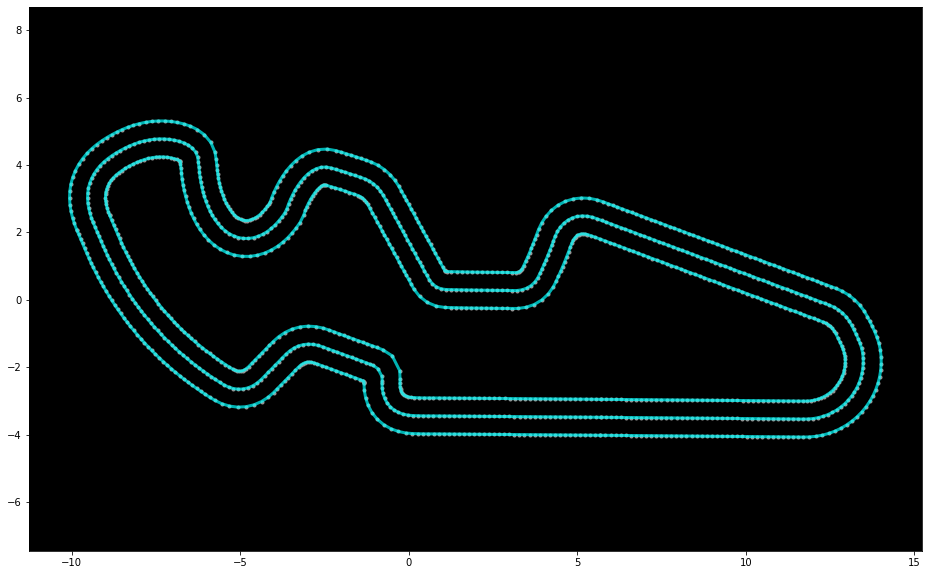

In [13]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

# Part 2 - Compute the action space

# Part 3 - Compute the optimal racing line using only actions from the action space

# Part 4 - Build the reward function

In [5]:
#les reward élémentaires sont à valeur dans ]0,2]

eps = 1e-3

def reward_function(params):
    
    coeff_exit = 1
    coeff_comp = 1
    coeff_speed = 1
    coeff_steer = 1
    coeff_traj = 1
    
    optimal_racing_line = pd.DataFrame()
    
    exit_track_reward = coeff_exit * exit_track_reward(params)
    completion_reward = coeff_comp * completion_reward(params)
    opti_speed_reward = coeff_speed * opti_speed_reward(params,optimal_racing_line)
    opti_steering_reward = coeff_steer * opti_steering_reward(params,optimal_racing_line)
    opti_trajectory_reward = coeff_traj * opti_trajectory_reward(params,optimal_racing_line)
    
    reward = exit_track_reward + completion_reward + opti_speed_reward + opti_steering_reward + opti_trajectory_reward
    
    return float(reward)

def exit_track_reward(params):
    
    all_wheels_on_track = params['all_wheels_on_track']
    
    if (all_wheels_on_track):
        reward = 1
    else:
        reward = eps
    return float(reward)

def completion_reward(params):
    
    progress = params['progress']
    
    reward = eps+ progress/100.
    if (progress > 90):
        reward += 1
    return float(reward)

def opti_speed_reward(params,optimal_racing_line):
    
    speed = params['speed']
    progress = params['progress']
    
    opti_speed = optimal_racing_line['speed'].values[progress]
    reward = eps+1-abs(speed-opti_speed)/opti_speed
    return float(reward)

def opti_steering_reward(params,optimal_racing_line):
    
    steering_angle = params['steering_angle']
    progress = params['progress']
    
    opti_steering = optimal_racing_line['steering'].values[progress]
    reward = eps+1-abs(steering_angle-opti_steering)/opti_steering
    return float(reward)
    
def racing_trajectory_reward(params,optimal_racing_line):
    
    x,y = params['x'], params['y']
    progress = params['progress']
    
    opti_x = optimal_racing_line['x'].values[progress]
    opti_y = optimal_racing_line['y'].values[progress]
    reward = eps+1-np.sqrt((opti_x-x)**2+(opti_y-y)**2)/np.sqrt(opti_x**2+opti_y**2)
    return float(reward)
